In [1]:
##description: multi sample analysis by eccDNA-pipe
##author:fmh

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import os
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"

plt.rcParams['font.size'] = 42
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi=50, facecolor='white')
%matplotlib inline

In [11]:
def get_ecc_length_ecc(_list, path_share, tool='cresil'):
    """
    _list: group ,list 
    path_share: share path ,str
    """
    result_df = pd.DataFrame()
    for index, name in enumerate(_list):
        df = pd.read_csv(path_share+'/'+tool+'/'+name+'/ecc_pipe_result/cresil_qc.txt', sep='\t')
        middle_df = df.loc[:, ['merge_len']]
        middle_df['type'] = name
        result_df = pd.concat([result_df, middle_df], axis=0)
    return result_df

In [12]:
def get_ecc_chrom_ratio(_list, path_share, tool='cresil'):
    """
    _list: group ,list 
    path_share: share path ,str
    """
    result_df = pd.DataFrame()
    for index, name in enumerate(_list):
        middle_df = pd.read_csv(path_share+'/'+tool+'/'+name+'/ecc_pipe_result/01.chr_distrbution/'+tool+'_chr_distribution.csv',
                         sep=',', index_col=0)
        _sum = middle_df['number'].sum()
        middle_df['number'] = middle_df['number'].map(lambda x: x/_sum)
        middle_df.columns = [name]
        result_df = pd.concat([result_df, middle_df], axis=1)
    result_df = result_df.fillna(0)
    ##rank by chr number
    result_df = result_df.reindex(['chr'+str(i+1) for i in range(22)]+['chrX', 'chrY'])
    return result_df

In [18]:
def plot_chrom_barplot(df_count, save='None'):
    
    fig=plt.figure(figsize=(13, 6))#调整画布大小
    x = df_count.index
    width = 0.65
    chr_list = ['chr'+str(i+1) for i in range(22)]+['chrX', 'chrY']
    color_map = ['#ffe4b5', '#ffa500', '#daa520', '#ffdead', '#ff1493', '#ff7f50',
           '#ff69b4', '#ffc0cb', '#ff7f50', '#b22222', '#f08080', '#dc143c',
           '#ff0000', '#800080', '#4b0082', '#eeb3ea', '#c46da0', '#539ecd',
           '#dbe9f6', '#4682b4', '#89bedc', '#00ced1', '#40e0d0', '#538be9']
    color_dict = dict(zip(chr_list, color_map))
    y_sum = np.array([0 for i in range(df_count.shape[0])])
    for i in range(df_count.shape[1]):
        y_subset = np.array(df_count.iloc[:, i].values)
        celltype = df_count.columns[i]
        if i == 0 :
            plt.barh(x, y_subset, width, color=color_dict[celltype])
            y_sum = y_sum+y_subset
        else:
            plt.barh(x, y_subset, width, color=color_dict[celltype], left=y_sum)
            y_sum = y_sum+y_subset
    plt.legend(labels=chr_list, bbox_to_anchor=(1.1, 1.2))
    if save != None:
        plt.savefig(save, bbox_inches='tight')
    plt.show()

## cresil

In [13]:
_list = ['E0771', 'EJM']
path_share = './data/'

In [14]:
dis_df = get_ecc_length_ecc(_list, path_share)
dis_df.head()

,merge_len,type
0,4633,E0771
1,5015,E0771
2,2636,E0771
3,1053,E0771
4,7685,E0771


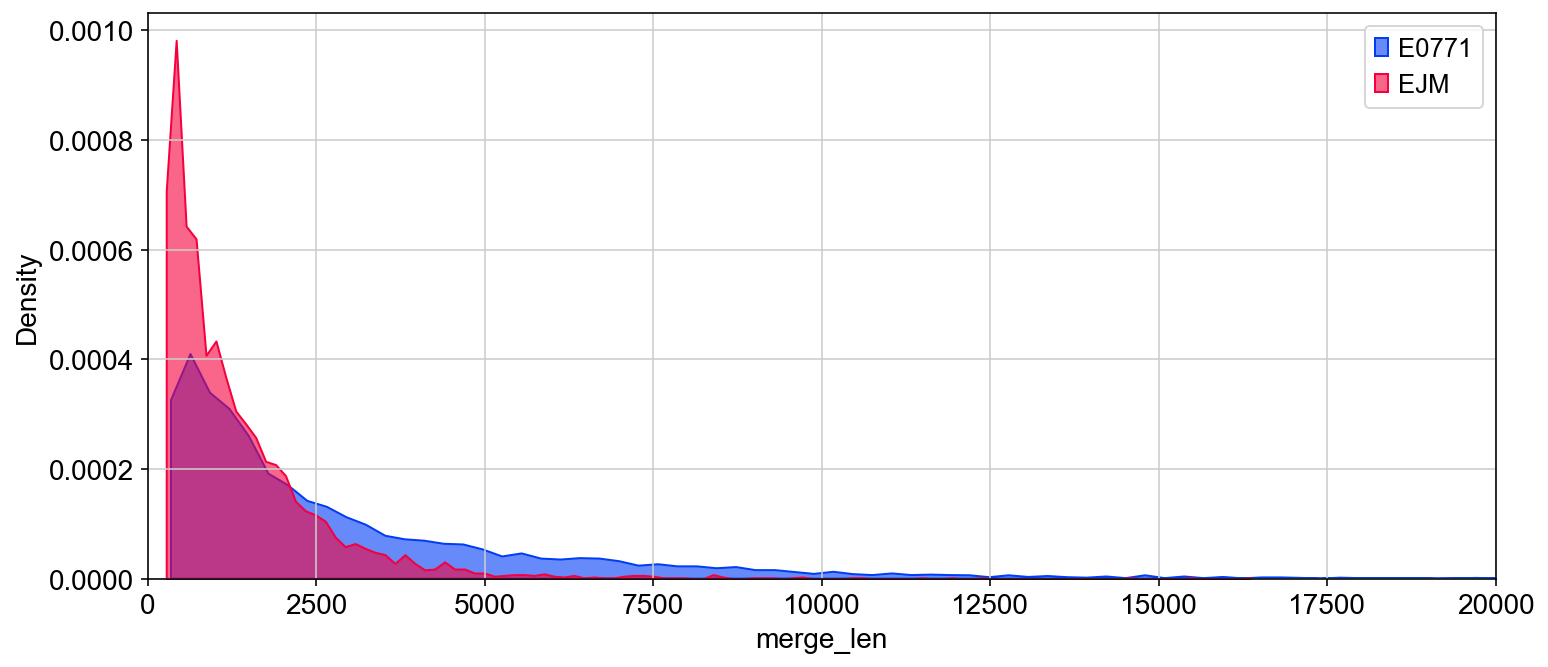

In [15]:
save = None
fig, ax = plt.subplots(figsize=(12,5))
x1 = dis_df[dis_df['type'].isin(['E0771'])]['merge_len']
x2 = dis_df[dis_df['type'].isin(['EJM'])]['merge_len']
sns.histplot(x1,
             element="poly",stat='density',
             thresh=10**6,alpha=0.6, ax=ax, color='#003DF5')
sns.histplot(x2,
             element="poly",stat='density',
             thresh=10**6,
             alpha=0.6, ax=ax, color='#F5003D')
ax.set(xlim=(0, 20000))
plt.legend(labels=['E0771', 'EJM'])
if save != None:
    plt.savefig(save, bbox_inches='tight')

In [16]:
chrom_df = get_ecc_chrom_ratio(_list, path_share)
chrom_df.head()

,E0771,EJM
chr1,0.067317,0.082268
chr2,0.067439,0.072890
chr3,0.070732,0.078645
chr4,0.055488,0.052856
chr5,0.051951,0.055413


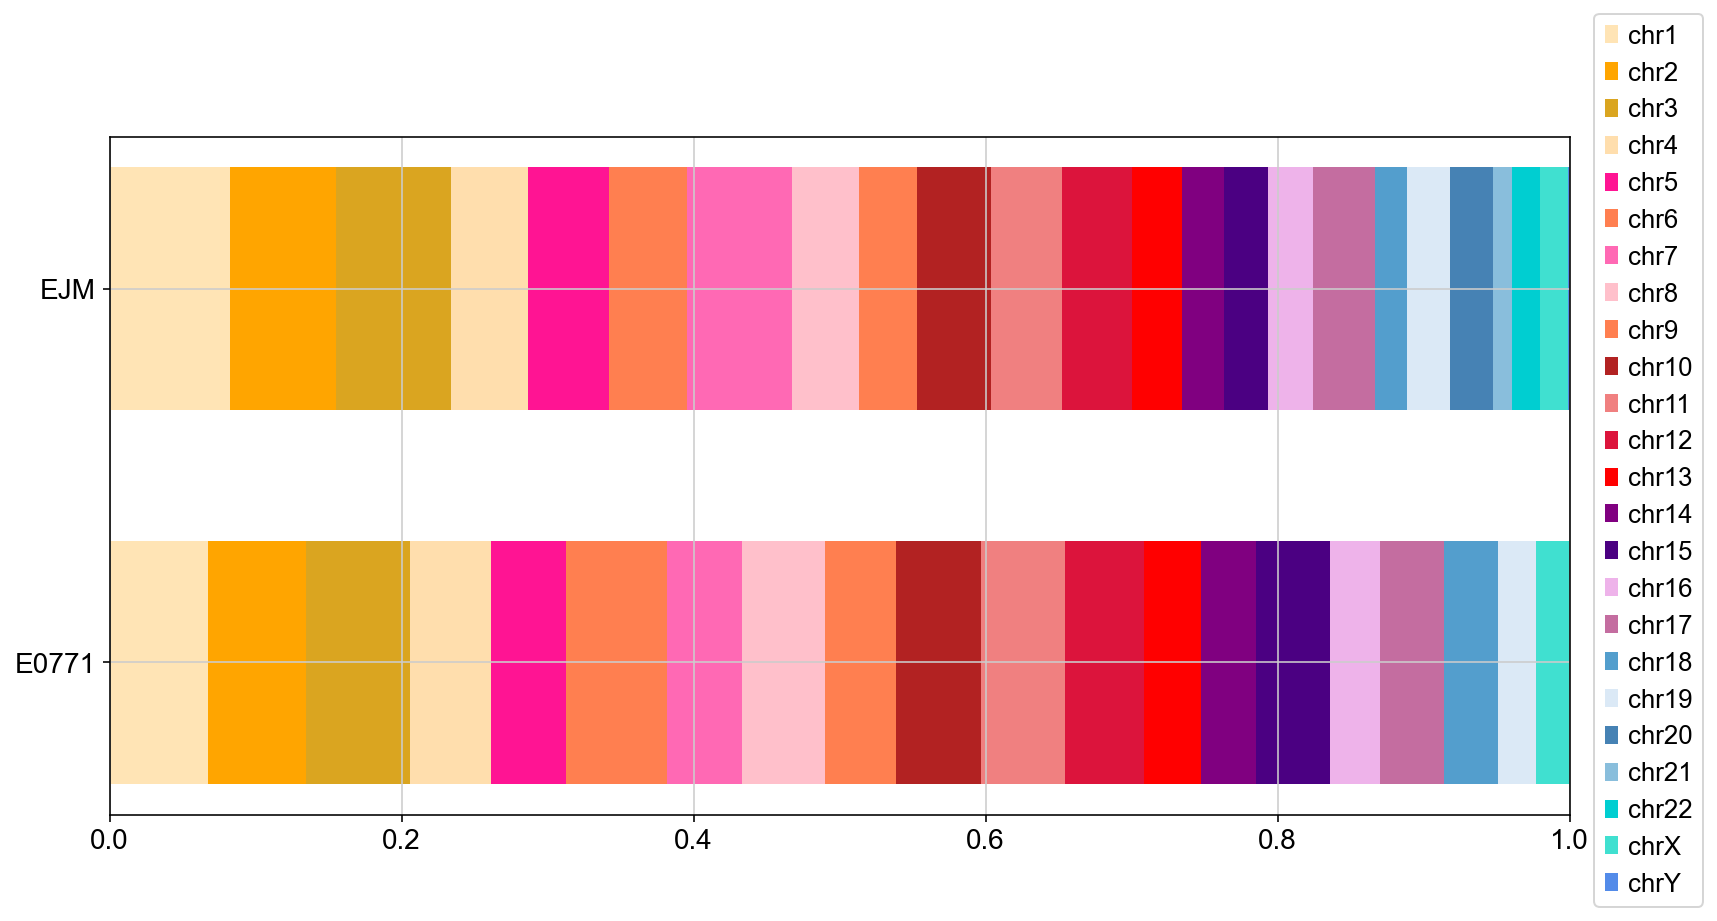

In [19]:
plot_chrom_barplot(chrom_df.T, save=None)